In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

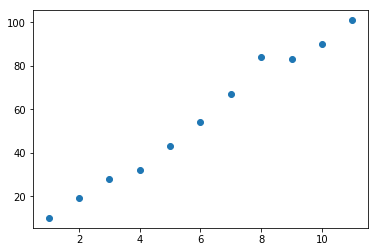

In [2]:
# Sample data to play with.
y = pd.DataFrame([10, 19, 28, 32, 43, 54, 67, 84, 83, 90, 101])
x = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.scatter(x, y)

Coefficients: 
 [[ 9.38181818]]
Intercept: 
 [-0.74545455]


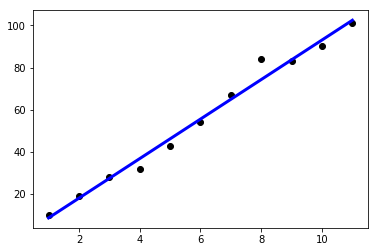

In [3]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

In [54]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4, skip_footer=3)
df.columns = [c.replace('\n', ' ') for c in df.columns]
df.to_csv('cleaned_crime.csv')
df = pd.read_csv('cleaned_crime.csv', index_col=0)

In [62]:
#df_offenses.head()
#Propertycrime=α+Population+Population2+Murder+Robbery
#Propertycrime=α+Population+Population2+Murder+Robbery

y = df['Property crime']

input_data = df[['Population', 'Murder and nonnegligent manslaughter', 'Robbery']].copy()
input_data['Pop2'] = df['Population'] ** 2
input_data.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Pop2
0,1861,0,0,3463321
1,2577,0,0,6640929
2,2846,0,0,8099716
3,97956,8,227,9595377936
4,6388,0,4,40806544


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

lg = LinearRegression()
lg.fit(scale(input_data), y)

print(lg.coef_)
#lg = LinearRegression()
#lg.fit(scale(input_data), df['Property crime'])
#[  1.59237145e-02   1.17559916e+02   2.09186426e+00  -1.01046282e-09]

[ 7155.82591664  2148.67724098  2153.67580861 -3812.9036369 ]


c:\users\lkonig\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
